In [19]:
# Import necessart libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_cig = pd.read_csv('cigarette.csv')                                 # import the data file cigarette.csv
df_cig = df_cig.loc[:, ~ df_cig.columns.str.contains('Unnamed')]      # removing the unnamed column
df_cig

,state,year,price,pop,pop16,cpi,ndi,sales,pimin
0,1,63,28.6,3383.0,2236.5,30.6,1558.304530,93.9,26.1
1,1,64,29.8,3431.0,2276.7,31.0,1684.073203,95.4,27.5
2,1,65,29.8,3486.0,2327.5,31.5,1809.841875,98.5,28.9
3,1,66,31.5,3524.0,2369.7,32.4,1915.160357,96.4,29.5
4,1,67,31.6,3533.0,2393.7,33.4,2023.546368,95.5,29.6
...,...,...,...,...,...,...,...,...,...
1375,51,88,112.9,479.0,353.0,118.3,11803.000000,114.3,115.3
1376,51,89,118.6,475.0,352.0,124.0,12399.000000,111.4,123.0
1377,51,90,129.5,470.9,348.9,130.7,13871.000000,96.9,138.9
1378,51,91,127.0,477.1,355.2,136.2,14675.000000,109.1,143.6


In [4]:
print(df_cig.describe())                 # get the descriptive statistiscs 
df_cig.info()                            # get dataframe column information

             state         year        price           pop         pop16  \
count  1380.000000  1380.000000  1380.000000   1380.000000   1380.000000   
mean     26.826087    77.500000    68.699928   4537.113188   3366.616087   
std      14.480570     8.658579    41.986261   4828.836452   3641.847150   
min       1.000000    63.000000    23.400000    319.000000    215.200000   
25%      15.000000    70.000000    34.775000   1053.000000    781.175000   
50%      26.500000    77.500000    52.300000   3174.000000   2315.300000   
75%      40.000000    85.000000    98.100000   5280.250000   3914.325000   
max      51.000000    92.000000   201.900000  30703.300000  22920.000000   

               cpi           ndi        sales        pimin  
count  1380.000000   1380.000000  1380.000000  1380.000000  
mean     73.596667   7525.023022   123.950870    62.899275  
std      36.529330   4747.858744    30.991047    38.323126  
min      30.600000   1322.572978    53.400000    23.400000  
25%      3

     state    Average  year  price     pop   pop16    cpi           ndi  \
0        7  78.453333    63   26.8  2716.0  1883.5   30.6   2913.680015   
1        7  78.453333    64   27.8  2784.0  1929.7   31.0   3104.144592   
2        7  78.453333    65   28.1  2830.0  1961.5   31.5   3249.668089   
3        7  78.453333    66   30.1  2886.0  2004.9   32.4   3493.633952   
4        7  78.453333    67   31.1  2918.0  2034.8   33.4   3763.280431   
..     ...        ...   ...    ...     ...     ...    ...           ...   
145     24  75.303333    88  141.7  4307.0  3312.0  118.3  13785.000000   
146     24  75.303333    89  152.5  4353.0  3339.0  124.0  14771.000000   
147     24  75.303333    90  162.3  4390.1  3367.5  130.7  15553.000000   
148     24  75.303333    91  173.9  4447.3  3406.0  136.2  15869.000000   
149     24  75.303333    92  197.7  4495.5  3440.5  140.3  17255.000000   

     sales  pimin  
0    156.2   26.2  
1    143.5   26.9  
2    147.0   26.5  
3    144.5   30.0  

<AxesSubplot:title={'center':'price'}, xlabel='state'>

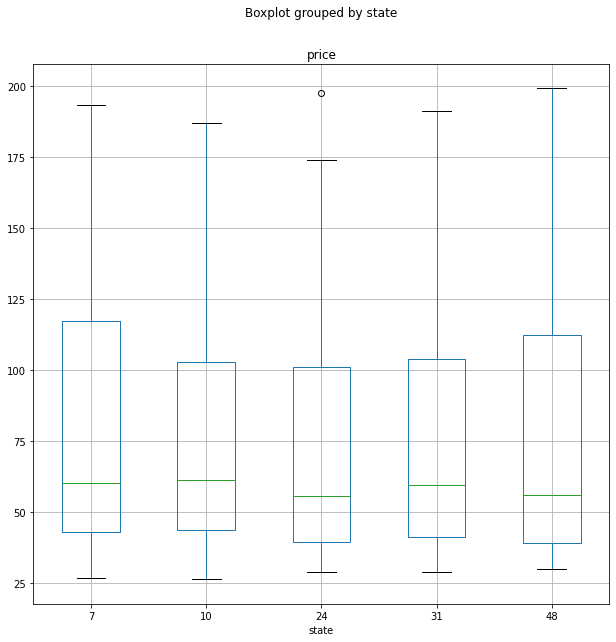

In [8]:
# Calculating the top 5 states with highest average of price per packet of cigrattes
df_mean = df_cig.groupby('state')['price'].mean().nlargest(5).to_frame()


# Merging the data frames to get the top 5 average prices of cigrattes per packet state wise and renaming the columns
df_merge = df_mean.merge(df_cig, on = 'state', how = 'inner')
df_merge.rename(columns = {"price_x":"Average"}, inplace = True)
df_merge.rename(columns = {"price_y":"price"}, inplace = True)
print(df_merge)


#plotting the boxplot
df_merge.boxplot(by = 'state' ,column = 'price', figsize = (10,10))


In [1]:
# Import necessart libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot  
import seaborn as sns
from datetime import datetime 
%matplotlib inline

In [2]:
# Importing Pandemic Data
df_pand = pd.read_csv('Pandemic.csv')
df_pand['ds'] = pd.to_datetime(df_pand['ds'], dayfirst = True)  # Converting data time column from string to datatime format

df_pand = df_pand.iloc[:,[0,1,5,6]]                             # Filtering required columns 
df_pand = df_pand.sort_values('ds')                             # Sorting data frame as per the dates
df_pand


,ds,location,data_type,value
121975,2020-01-22,"Nova Scotia, Canada",deaths_new,0
53075,2020-01-22,"French Guiana, France",recovered_new,0
26828,2020-01-22,Cambodia,recovered_new,0
168326,2020-01-22,Uganda,deaths_new,0
26742,2020-01-22,Cambodia,deaths_new,0
...,...,...,...,...
73457,2020-09-08,"Hong Kong, China",deaths_new,1
73265,2020-09-08,"Hong Kong, China",recovered_new,19
145654,2020-09-08,"Sichuan, China",recovered_new,5
145905,2020-09-08,"Sichuan, China",deaths_new,0


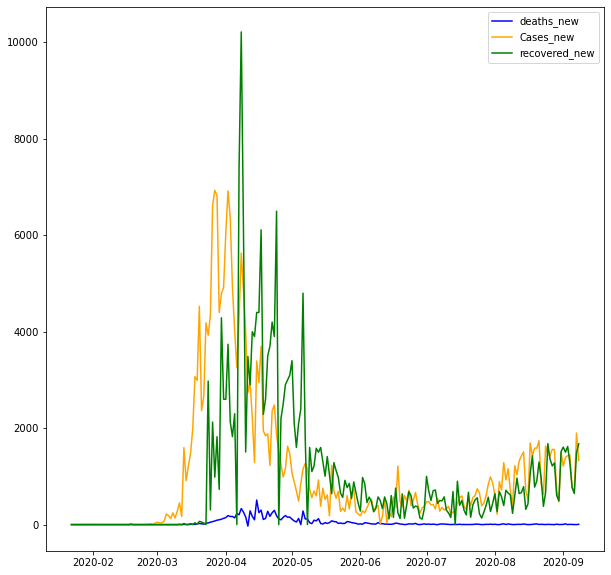

In [6]:
# Filtering data as per location i.e. Germany and repeating the same steps for plotting as above
df_ger = df_pand[(df_pand['location'] == 'Germany')]
df_ger.sort_values('ds')
df_deaths = df_ger[(df_ger['data_type']) == 'deaths_new']
df_new = df_ger[(df_ger['data_type']) == 'cases_new']
df_rec = df_ger[(df_ger['data_type']) == 'recovered_new']

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(df_deaths['ds'], df_deaths['value'], label = 'deaths_new', color = 'blue')
ax.plot(df_new['ds'], df_new['value'], label = 'Cases_new', color = 'orange')
ax.plot(df_rec['ds'], df_rec['value'], label = 'recovered_new', color = 'green')
plt.legend()
plt.show()

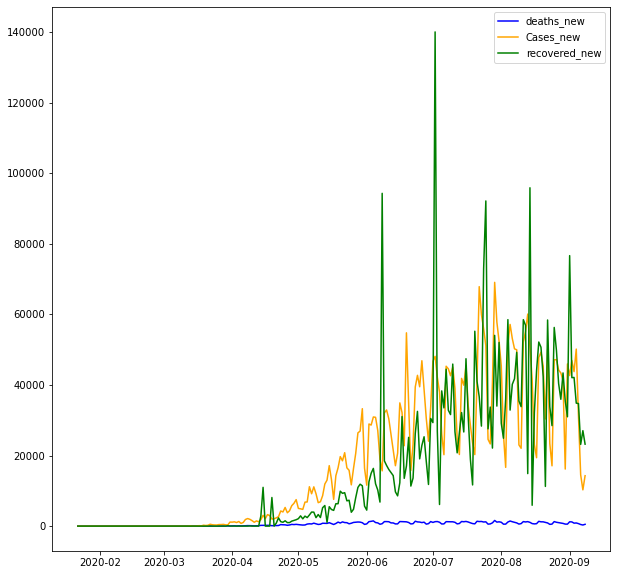

In [7]:
# Filtering data as per location i.e. Brazil and repeating the same steps for plotting as above

df_br = df_pand[(df_pand['location'] == 'Brazil')]
df_br.sort_values('ds')
df_deaths = df_br[(df_br['data_type']) == 'deaths_new']
df_new = df_br[(df_br['data_type']) == 'cases_new']
df_rec = df_br[(df_br['data_type']) == 'recovered_new']

fig, ax = plt.subplots(figsize = (10,10))
ax.plot(df_deaths['ds'], df_deaths['value'], label = 'deaths_new', color = 'blue')
ax.plot(df_new['ds'], df_new['value'], label = 'Cases_new', color = 'orange')
ax.plot(df_rec['ds'], df_rec['value'], label = 'recovered_new', color = 'green')
plt.legend()
plt.show()

# Task C

In [8]:
# Import necessart libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot  
import seaborn as sns
from datetime import datetime 
%matplotlib inline

**Task 1**

In [9]:
# Import Nobel Prize data and getting the descriptive and informative information for the data
df_prize = pd.read_csv('Nobel Prize.csv')
print(df_prize.describe())
df_prize.info()

              Year  Laureate ID
count   969.000000   969.000000
mean   1970.287926   470.152735
std      32.937498   274.586623
min    1901.000000     1.000000
25%    1947.000000   230.000000
50%    1976.000000   462.000000
75%    1999.000000   718.000000
max    2016.000000   937.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  969 non-null    int64 
 1   Category              969 non-null    object
 2   Prize                 969 non-null    object
 3   Motivation            881 non-null    object
 4   Prize Share           969 non-null    object
 5   Laureate ID           969 non-null    int64 
 6   Laureate Type         969 non-null    object
 7   Full Name             969 non-null    object
 8   Birth Date            940 non-null    object
 9   Birth City            941 non-null    object
 10  Bi

In [10]:
# grouping by the organization country and finding the counts of the prize won by each country
df_prize.groupby('Organization Country',as_index = False)['Prize'].count().nlargest(10, columns = 'Prize')

,Organization Country,Prize
28,United States of America,363
27,United Kingdom,91
12,Germany,51
11,France,40
9,Federal Republic of Germany,26
25,Switzerland,22
18,Japan,18
24,Sweden,17
19,Netherlands,11
26,Union of Soviet Socialist Republics,11


**Task 2**

In [11]:
# filtering the prize data frame to get only females and getting the first female to win the Nobel prize using iloc
df_female = df_prize[(df_prize['Sex'] == 'Female')]
df_female = df_female['Full Name']
print("The first woman to won a Nobel Prize is :",df_female.iloc[0])

The first woman to won a Nobel Prize is : Marie Curie, née Sklodowska


**Task 3**

In [12]:
# grouping by Category and Sex and getting the count of Prize won by Males and Females in each Category
df_prize.groupby(['Category','Sex'],as_index = False)['Prize'].count().nlargest(10, columns = 'Prize').sort_values('Category')

,Category,Sex,Prize
1,Chemistry,Male,190
0,Chemistry,Female,4
3,Economics,Male,81
5,Literature,Male,99
4,Literature,Female,14
7,Medicine,Male,215
6,Medicine,Female,12
9,Peace,Male,88
8,Peace,Female,16
11,Physics,Male,220


**Task 4**

In [13]:
# grouping by Organization Name and calculating the count of Prize won by each university and displaying the top 25 winners
df_org = df_prize.groupby('Organization Name', as_index = False)['Prize'].count().nlargest(25, columns = 'Prize')
df_org

,Organization Name,Prize
240,University of California,34
76,Harvard University,27
141,Massachusetts Institute of Technology (MIT),18
209,Stanford University,18
26,California Institute of Technology (Caltech),17
243,University of Cambridge,17
244,University of Chicago,17
40,Columbia University,16
183,Princeton University,14
81,Howard Hughes Medical Institute,11


**Task 5: PLot the Category that received the highest awards**

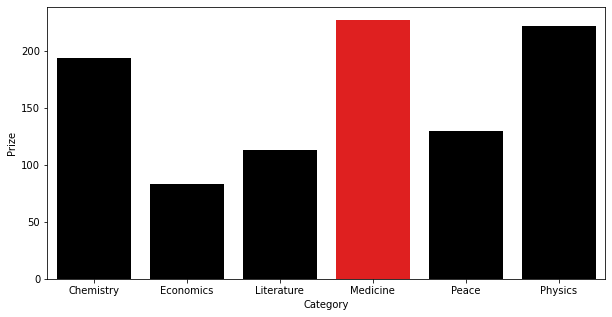

In [20]:
# filering the Category and Prize columns

df_gph = df_prize.iloc[:,[1,2]]

#grouping by Category and calculating the prizes won in each category 
df_gph = df_gph.groupby(['Category'], as_index = False)['Prize'].count().sort_values('Category')

#plotting the category wise distribution of Prizes and getting the category with highest awards i.e Medicine in Red
fig, ax = plt.subplots(figsize = (10,5))
clrs = ['black' if (x < max(df_gph['Prize'])) else 'red' for x in df_gph['Prize'] ]
sns.barplot(df_gph['Category'],df_gph['Prize'], palette = clrs)
plt.show()

# Task D

In [15]:
# Import necessart libraries

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot  
import seaborn as sns
from datetime import datetime 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3006 non-null   float64
 1   Admin2          3009 non-null   object 
 2   Province_State  3232 non-null   object 
 3   Country_Region  3410 non-null   object 
 4   Last_Update     3410 non-null   object 
 5   Lat             3341 non-null   float64
 6   Long_           3341 non-null   float64
 7   Confirmed       3410 non-null   int64  
 8   Deaths          3410 non-null   int64  
 9   Recovered       3410 non-null   int64  
 10  Active          3410 non-null   int64  
 11  Combined_Key    3410 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 319.8+ KB


In [17]:
df_graph = df.iloc[:,[3,7,9]]
df_graph = df_graph[(df_graph['Country_Region'] == 'US') | (df_graph['Country_Region'] == 'Brazil') |  (df_graph['Country_Region'] == 'Russia') | (df_graph['Country_Region'] == 'United Kingdom') | (df_graph['Country_Region'] == 'Spain')]
df_group = df_graph.groupby(['Country_Region'], as_index = False)['Confirmed','Recovered'].sum()
df_group = df_group.sort_values(by = 'Confirmed', ascending = False)
df_group

,Country_Region,Confirmed,Recovered
3,US,1662315,379157
0,Brazil,374898,153833
1,Russia,353427,118798
4,United Kingdom,262547,1161
2,Spain,235400,150376


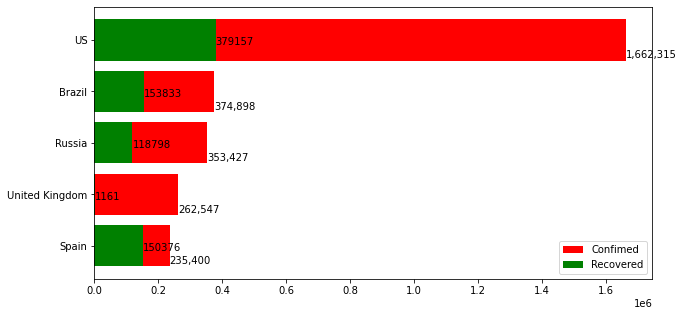

In [18]:
fig, ax = plt.subplots(figsize = (10,5))

plt.barh(df_group['Country_Region'], df_group['Confirmed'], color = 'red', label = 'Confimed')
plt.barh(df_group['Country_Region'], df_group['Recovered'], color = 'green', label = 'Recovered')
ax.invert_yaxis()
plt.legend()


for i,(v,n) in enumerate(zip(df_group['Confirmed'],df_group['Recovered'])):
    ax.text(v, i + 0.35,f'{v:,.0f}', color='black' )
    ax.text(n, i + 0.1,f'{n:.0f}', color = 'black')
plt.show()
